In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Food Waste data and research - by country.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

¿Cuántas features (columnas) tiene este dataset?: El dataset tiene 12 features. 
¿Cuántas entradas tiene este dataset?: Tiene 214 entradas.


In [6]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


¿Qué columnas serían útiles para un modelo?:
Se puede crear un modelo para predecir cuanta será la cantidad de basura de comida que se genera por país dado un aumento en la vivienda, servicios de comida y producción. Esto puede permitir la instalación de generadores de energia por desechos en puntos estrategicos para que el coste de transporte no sea tan alto y pueda llegar a diversos países y ciudades.
Para esto modelo se usarán las columnas de "Country", "Household estimate", "Retail estimate", "Food service", "Combined figures"

¿Qué tipos de datos hay aquí? ¿Son datos estructurados?: Todos los datos son datos estructurados

Para los tipos de datos que son objeto, ¿Qué tipo de objeto son (string, list, etc.)?: Todos los datos que son object son strings, por lo que se pueden convertir a string o categoricos.

In [7]:
df.isna().sum() #Para ver cuantos valores nulos hay en cada columna

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

¿Hay datos nulos? Compruebalo con Pandas: No hay datos nulos

In [12]:
correlation_matrix = df.corr(method="pearson").round(2)

C:\Users\progra.DESKTOP-GV4Q93K\AppData\Local\Temp\ipykernel_280\1960101688.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="pearson").round(2)


<Axes: >

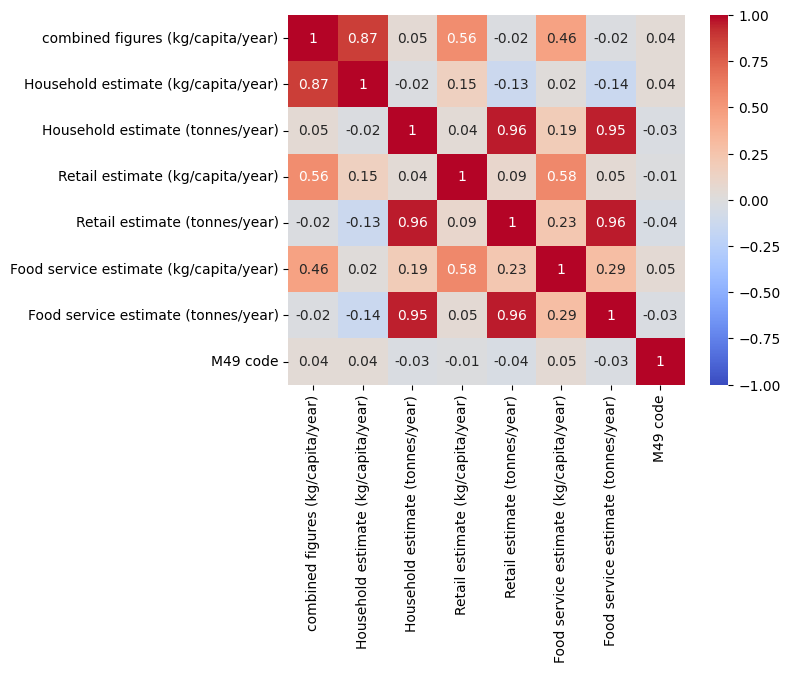

In [14]:
sns.heatmap(data=correlation_matrix, vmax=1,vmin=-1, annot=True, cmap='coolwarm')

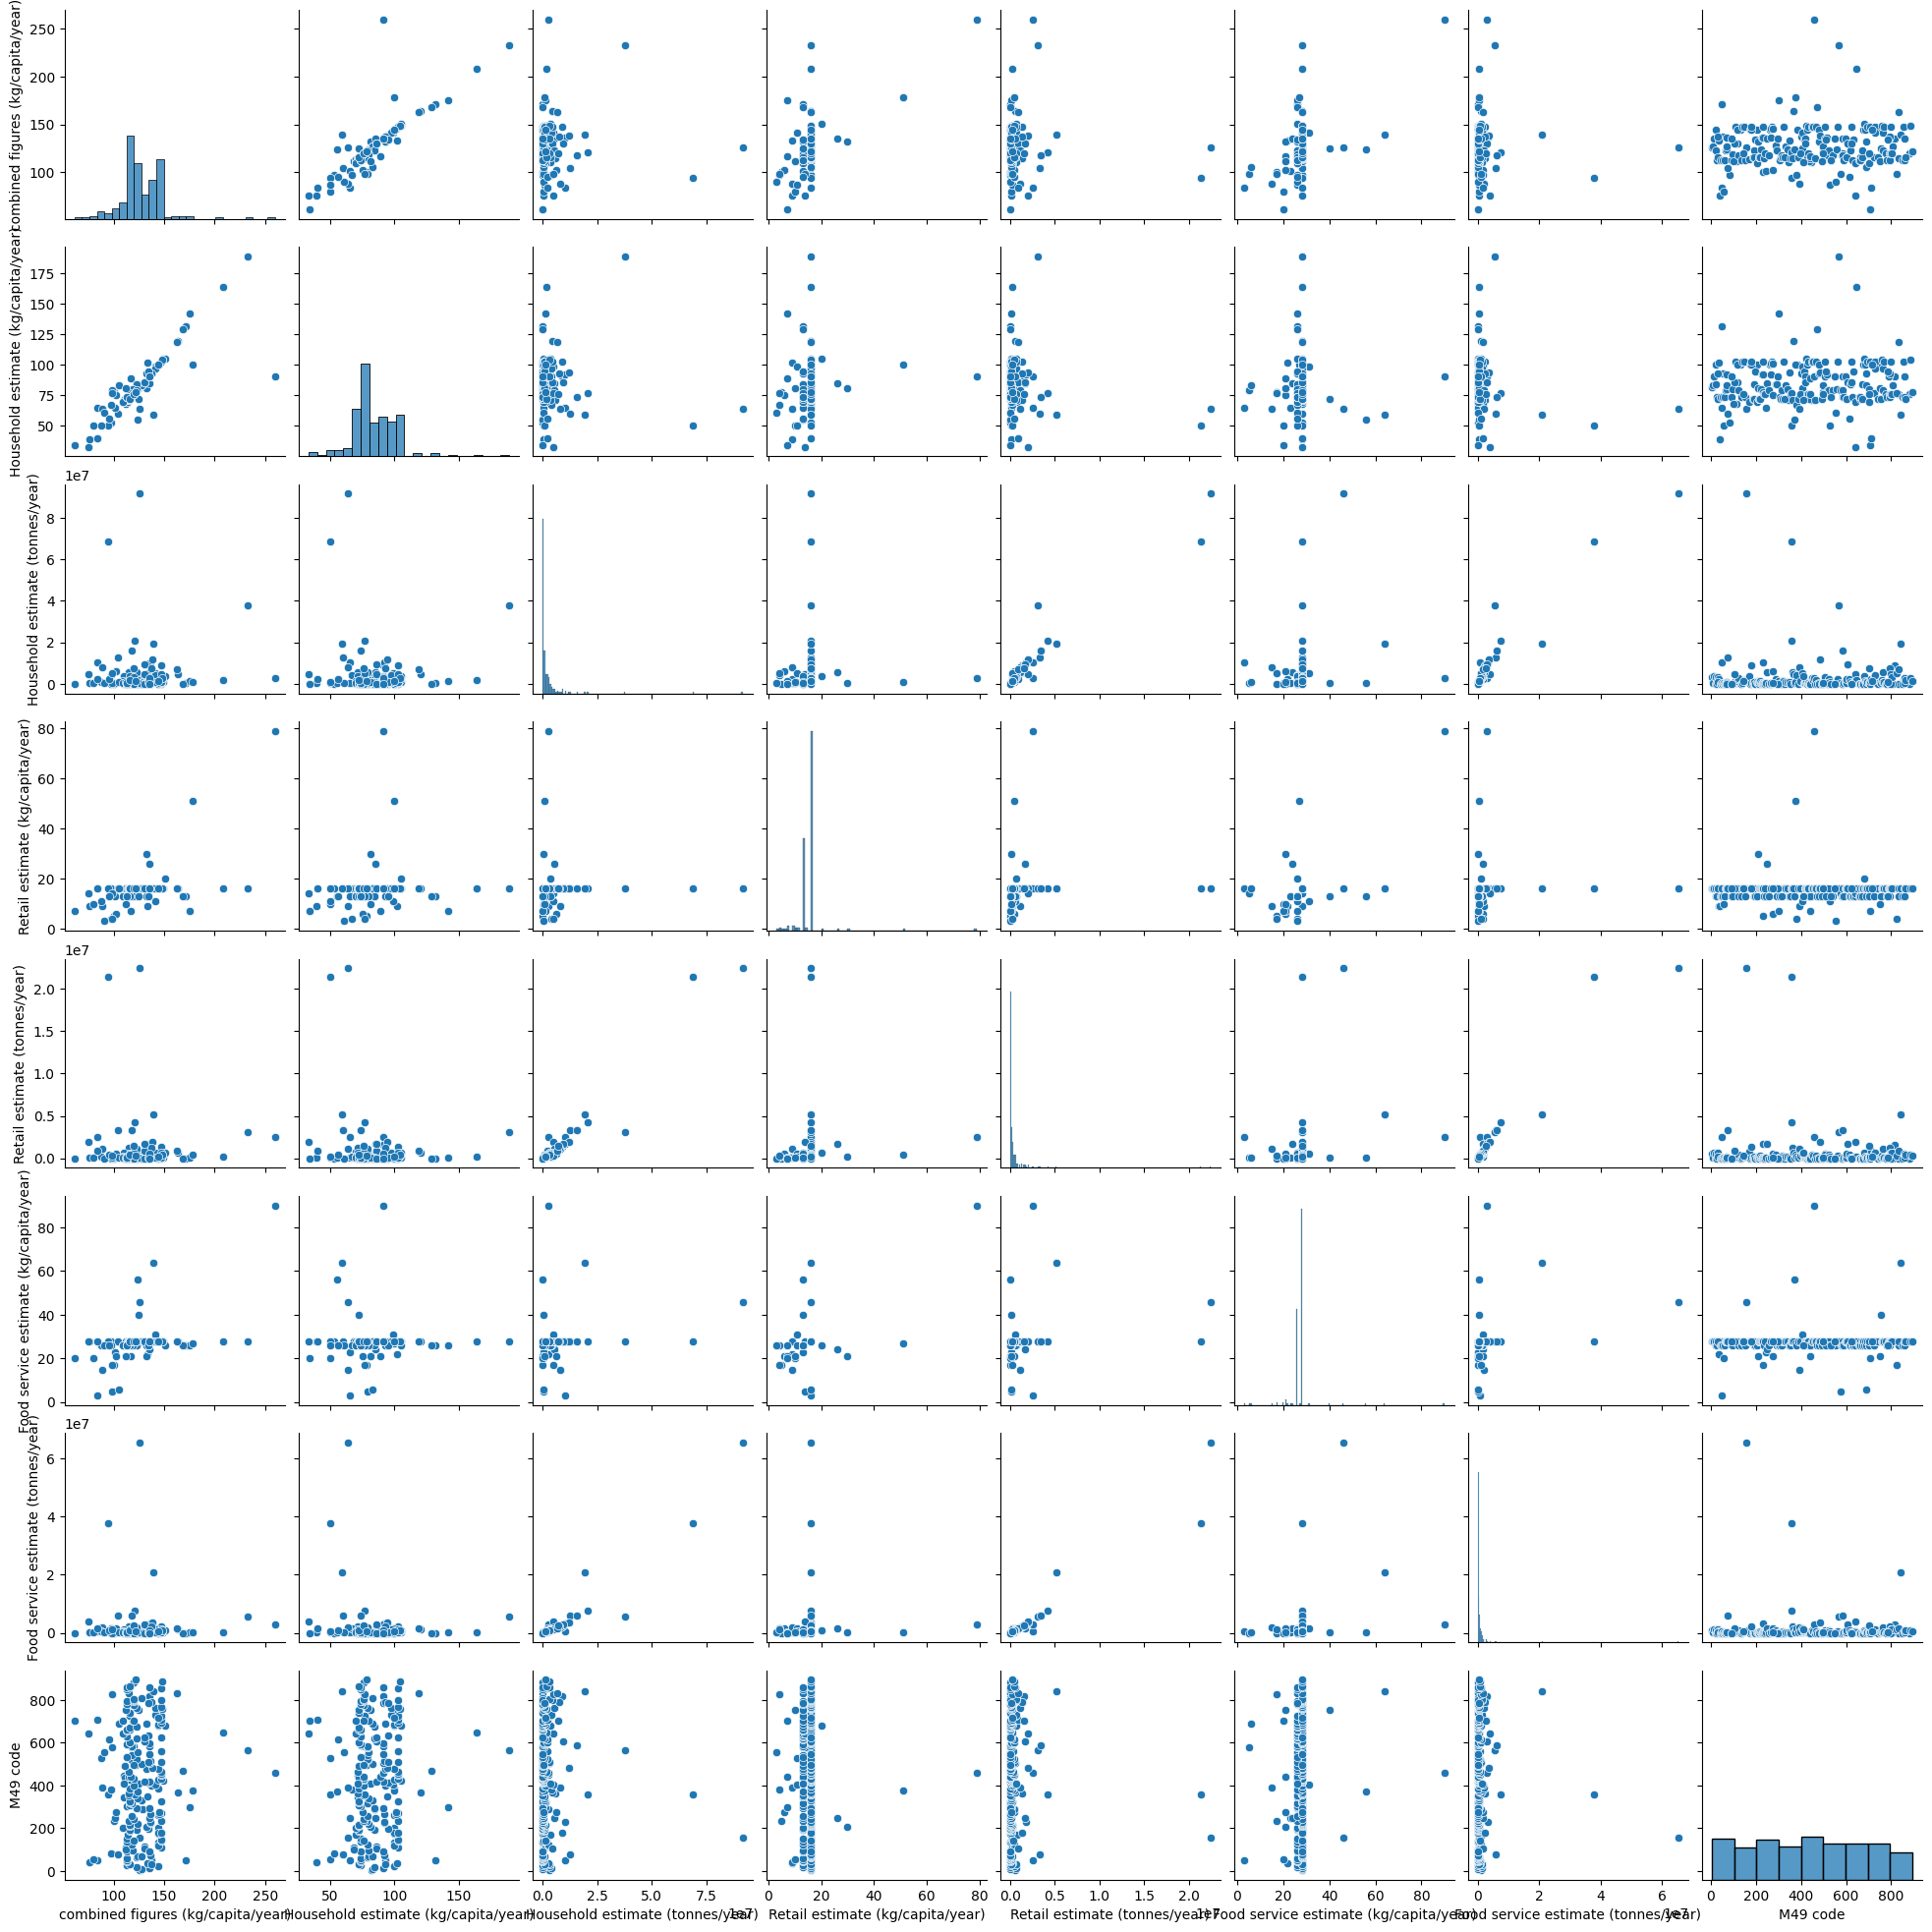

In [25]:
sns.pairplot(df)

<Axes: >

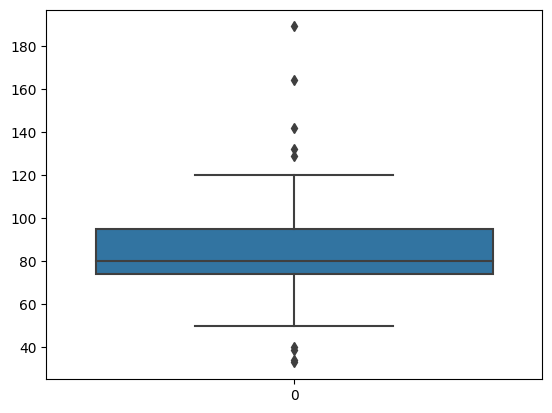

In [32]:
sns.boxplot(df["Household estimate (kg/capita/year)"])

¿Hay alguna columna con datos atipicos?

<Axes: >

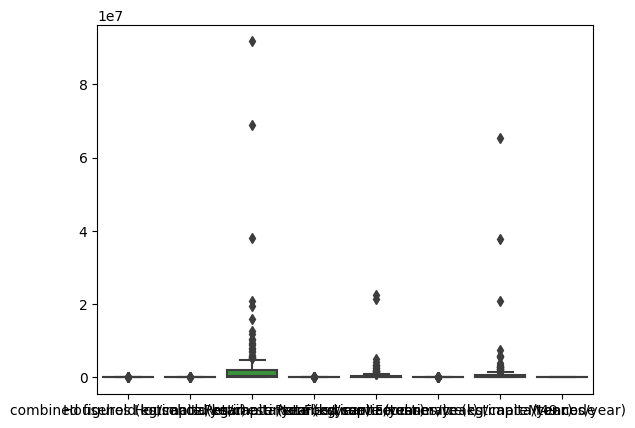

In [33]:
sns.boxplot(df)

Parece que en los datos estimados de toneladas por año existen valores atípicos y para revisar más a profundidad se pueden graficar cada uno separado.

<Axes: >

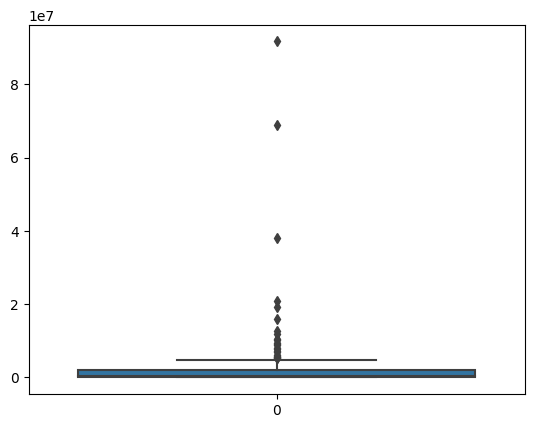

In [34]:
sns.boxplot(df["Household estimate (tonnes/year)"])

<Axes: >

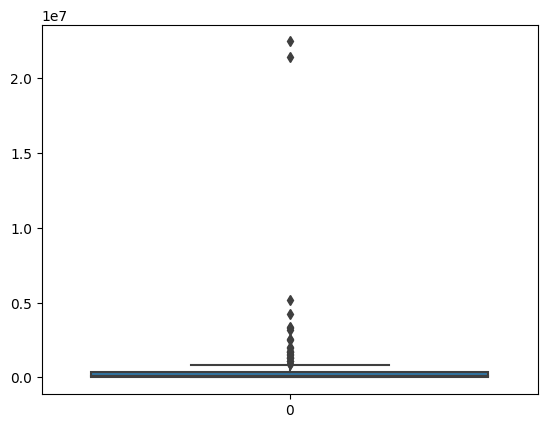

In [35]:
sns.boxplot(df["Retail estimate (tonnes/year)"])

<Axes: >

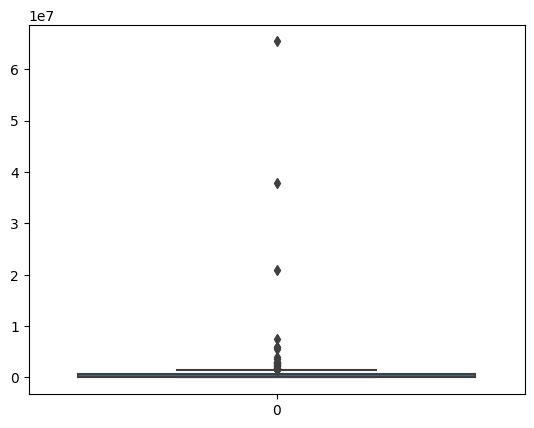

In [36]:
sns.boxplot(df["Food service estimate (tonnes/year)"])

Hay alguna columna con datos categoricos?, Si es asi ¿Estan balanceados?

In [38]:
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


<Axes: >

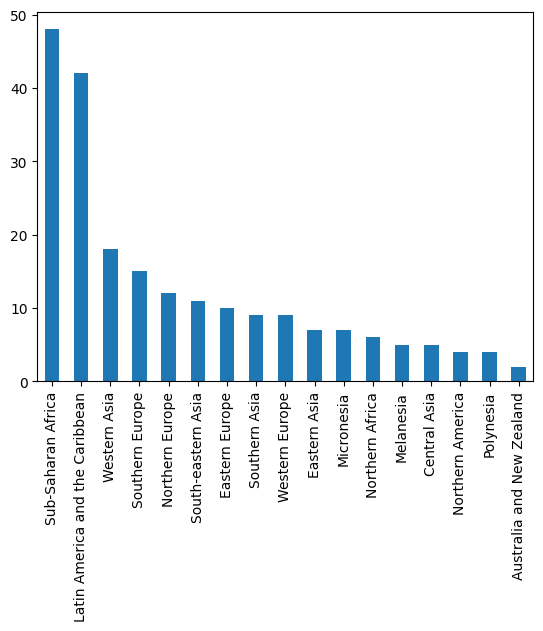

In [48]:
df["Region"].value_counts().plot(kind="bar")

<Axes: >

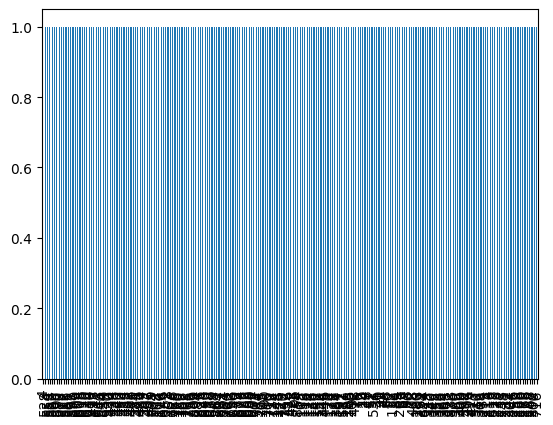

In [49]:
df["M49 code"].value_counts().plot(kind="bar")

<Axes: >

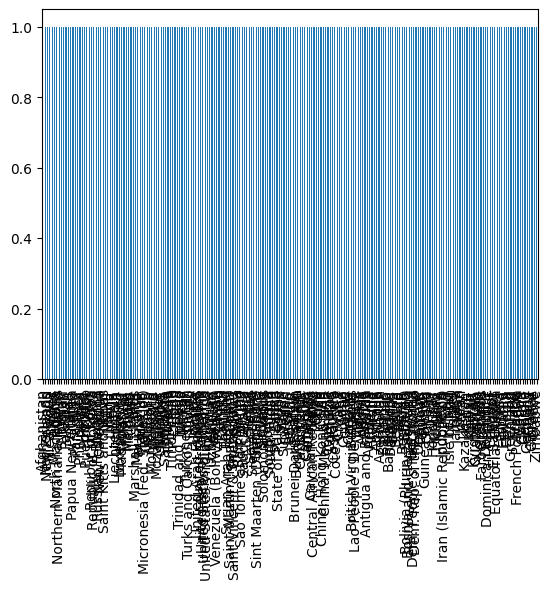

In [50]:
df["Country"].value_counts().plot(kind="bar")

<Axes: >

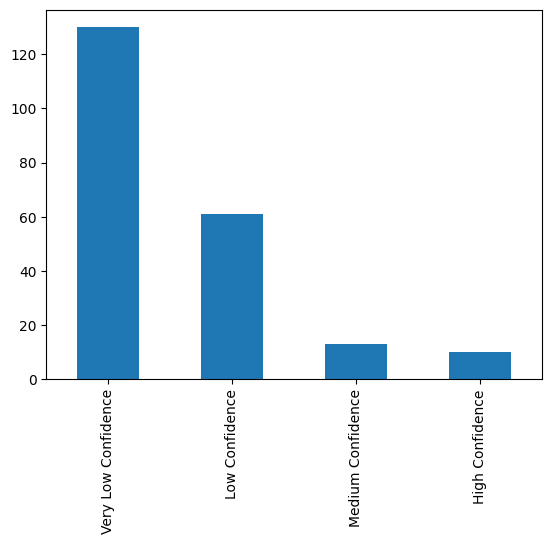

In [52]:
df["Confidence in estimate"].value_counts().plot(kind="bar")

Para el país y el codigo 49, los datos categoricos están balanceados, pero para confidencia de los datos y región no lo están.